## Exploratory Data Analysis - Melbourne Housing Market

In the following section we will have a look at the Housing market in Melbourne. The information consists of a dataset with over 60,000 rows and 13 columns, where the most relevant for our study are the property type, price, number of rooms, postcode and date. 

Our analysis will start with a general approach and then we will focus in some specific part of the market, in this particular case the 2 bedroom townhouses and units, as they represent a big portion of the complete housing market in Melbourne. 

Please refer to the link below in order to access the dataset implemented for this study (MELBOURNE_HOUSE_PRICES_LESS.csv)

Pino, T. (2018). Melbourne Housing Market. Retrieved from 
https://www.kaggle.com/anthonypino/melbourne-housing-market/downloads/melbourne-housing-market.zip/27#Melbourne_housing_FULL.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First of all, start reading the dataset and having an initial look to the first rows of it

In [2]:
# read the complete Melbourne Housing Market file
vicrs_df = pd.read_csv('0.MELBOURNE_HOUSE_PRICES_LESS.csv')

# Modify displaying format of floats
pd.options.display.float_format = '{:20,.2f}'.format

vicrs_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,"1,490,000.00",S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.00,Yarra City Council
1,Abbotsford,59A Turner St,3,h,"1,220,000.00",S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.00,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,"1,420,000.00",S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.00,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,"1,515,000.00",S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.50,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,"670,000.00",S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.40,Moonee Valley City Council


In [3]:
# Remove properties with price 0
filt = (vicrs_df.Price > 1)
vicrs_df = vicrs_df[filt]
vicrs_df['Price'].mean()

997898.2414882415

### Check the average price for the different Types of properties in the dataset

In [5]:
# Group by propertyType and see the average price
prop_type = {'Price':{'avg price':'mean'}}
groupby_prType = vicrs_df.groupby(['Type']).agg(prop_type)
groupby_prType = groupby_prType.reset_index()
groupby_prType.columns = groupby_prType.columns.droplevel(1)
groupby_prType

,Type,Price
0,h,"1,110,586.65"
1,t,"911,147.98"
2,u,"630,105.27"


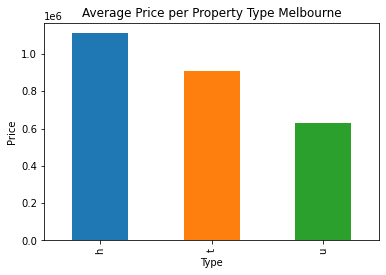

In [6]:
groupby_prType.plot(kind='bar', x = 'Type', y='Price', legend=False)
plt.title('Average Price per Property Type Melbourne')
plt.ylabel('Price')
plt.show()

In the above graph, we can see the different average prices per Property Type, in this case h refers to House, t corresponds to Town house, and u is Unit.

### Check the average price for the different number of bedrooms

In [7]:
# Group by num bedrooms, see the average price
bed_num = {'Price':{'avg price':'mean'}}
groupby_bed = vicrs_df.groupby('Rooms').agg(bed_num)
groupby_bed = groupby_bed.reset_index()
groupby_bed.columns = groupby_bed.columns.droplevel(1)
groupby_bed

,Rooms,Price
0,1,"433,225.65"
1,2,"746,092.61"
2,3,"958,527.99"
3,4,"1,236,714.83"
4,5,"1,627,292.13"
5,6,"1,668,343.11"
6,7,"1,628,479.17"
7,8,"1,634,211.37"
8,9,"1,190,000.00"
9,10,"2,781,666.67"


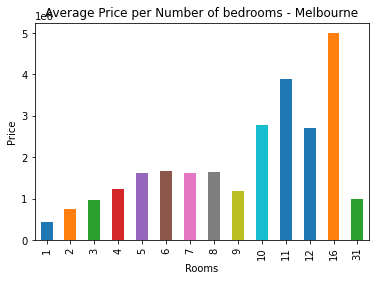

In [8]:
groupby_bed.plot(kind='bar', x = 'Rooms', y='Price', legend=False)
plt.title('Average Price per Number of bedrooms - Melbourne')
plt.ylabel('Price')
plt.show()

The average price per number of bedrooms is displayed in the above graph, however, there are many bars in the plot and we would prefer to focus our analysis in cases with at most 6 bedrooms.

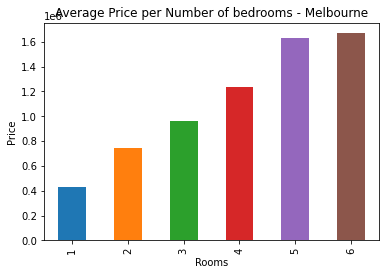

In [9]:
# Remove over 6 bedrooms and see new graph
filt= ~((groupby_bed['Rooms']>6))
groupby_bed=groupby_bed[filt]
groupby_bed.plot(kind='bar', x = 'Rooms', y='Price', legend=False)
plt.title('Average Price per Number of bedrooms - Melbourne')
plt.ylabel('Price')
plt.show()

### Focus on 2 bedroom units. Check the average price for them according to different property types

In [10]:
groupby_prType = vicrs_df.groupby(['Type','Rooms']).agg(prop_type)
groupby_prType = groupby_prType.reset_index()
groupby_prType.columns = groupby_prType.columns.droplevel(1)

filt = (groupby_prType.Rooms == 2)
groupby_prType2 = groupby_prType[filt]
groupby_prType2

,Type,Rooms,Price
1,h,2,"975,574.48"
15,t,2,"684,993.10"
20,u,2,"617,235.02"


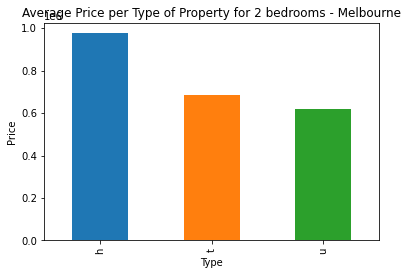

In [11]:
groupby_prType2.plot(kind='bar', x = 'Type', y='Price', legend=False)
plt.title('Average Price per Type of Property for 2 bedrooms - Melbourne')
plt.ylabel('Price')
plt.show()

### Get the average per region in 2 bedroom units or townhouses and show the top 10 most expensive regions in Melbourne

In [12]:
filt = (vicrs_df.Rooms == 2) & (vicrs_df.Type != 'h')
groupby_postcode = vicrs_df[filt]

post_gr = {'Price':{'avg price':'mean'}}
groupby_postcode = groupby_postcode.groupby(['Postcode','Rooms']).agg(post_gr)
groupby_postcode = groupby_postcode.reset_index()
groupby_postcode.columns = groupby_postcode.columns.droplevel(1)

larg_pricedf = groupby_postcode.nlargest(10,'Price')
larg_pricedf

,Postcode,Rooms,Price
1,3002,2,"1,129,603.53"
152,3206,2,"974,500.00"
102,3144,2,"962,047.62"
134,3186,2,"934,310.76"
153,3207,2,"892,665.25"
100,3142,2,"861,320.51"
48,3065,2,"833,261.90"
135,3187,2,"830,161.76"
87,3126,2,"808,770.83"
99,3141,2,"800,458.77"


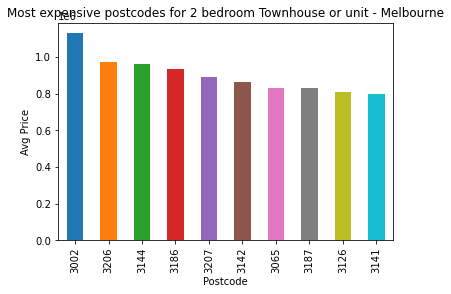

In [13]:
larg_pricedf.plot(kind='bar', x = 'Postcode', y='Price', legend=False)
plt.title('Most expensive postcodes for 2 bedroom Townhouse or unit - Melbourne')
plt.ylabel('Avg Price')
plt.show()

The above graphic shows the most expensive areas by postcode for 2 bedroom Townhouse or Unit

In [14]:
# Get the average per region in 2 bedroom units or townhouses and show the top 10 cheapest regions in Melbourne
smal_pricedf = groupby_postcode.nsmallest(10,'Price')
smal_pricedf

,Postcode,Rooms,Price
158,3754,2,"273,000.00"
154,3338,2,"294,285.71"
160,3976,2,"325,000.00"
161,3977,2,"326,500.00"
46,3061,2,"340,000.00"
34,3048,2,"348,250.00"
47,3064,2,"352,184.21"
19,3030,2,"354,357.14"
44,3059,2,"365,000.00"
127,3175,2,"370,382.76"


Text(0, 0.5, 'Avg Price')

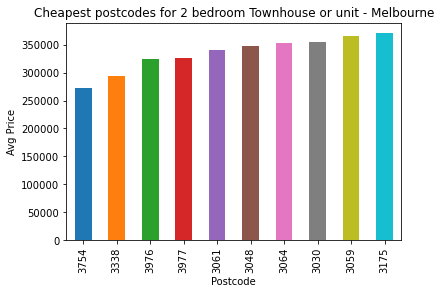

In [15]:
smal_pricedf.plot(kind='bar', x = 'Postcode', y='Price', legend=False)
plt.title('Cheapest postcodes for 2 bedroom Townhouse or unit - Melbourne')
plt.ylabel('Avg Price')

The above graphic shows the least expensive areas by postcode for 2 bedroom Townhouse or Unit

## Prediction
Now that we have been able to gather information about the 2 bedroom townhouses or units, we can have a look at the behaviour of the monthly average price for the period between Jan-2016 and Oct-2018. First of all we need to preprocess the data appending a new column with the month and year of each record.  

In [16]:
# Clean the date column of the data set to get a month/year column
new_date = []
for year in vicrs_df.Date:
    new_y = year[-7:]
    new_date.append(new_y)

vicrs_df['monthYearSold'] = new_date
vicrs_df['monthYearSold'] = pd.to_datetime(vicrs_df['monthYearSold'], format='%m/%Y')

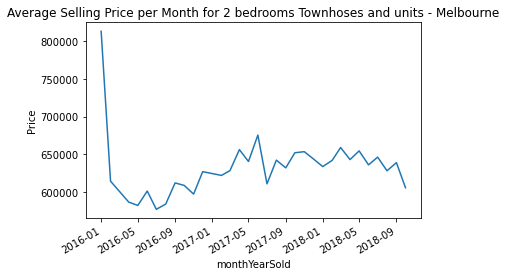

In [17]:
filt = (vicrs_df.Rooms == 2) & (vicrs_df.Type != 'h')
groupby_saledate = vicrs_df[filt]

date_gr = {'Price':{'avg price':'mean'}}
groupby_saledate = groupby_saledate.groupby(['monthYearSold','Rooms']).agg(date_gr)
groupby_saledate = groupby_saledate.reset_index()
groupby_saledate.columns = groupby_saledate.columns.droplevel(1)

groupby_saledate.plot(x = 'monthYearSold', y='Price', legend=False)
plt.title('Average Selling Price per Month for 2 bedrooms Townhoses and units - Melbourne')
plt.ylabel('Price')
plt.show()


In the above graph we can observe the average prices for the period described before. However, the first month seems to be very different (potential outlier), so we will perform our analysis excluding this record.

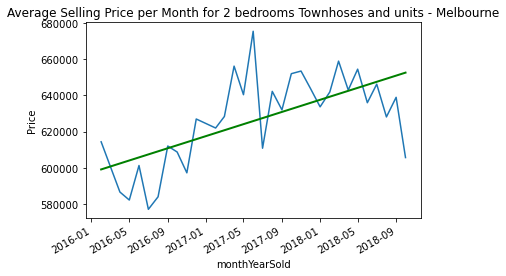

In [19]:
from scipy.stats import linregress

filt= ~((groupby_saledate['monthYearSold'] == '2016-01'))
groupby_saledate=groupby_saledate[filt]
groupby_saledate.plot(x = 'monthYearSold', y='Price', legend=False)
plt.title('Average Selling Price per Month for 2 bedrooms Townhoses and units - Melbourne')
plt.ylabel('Price')

# Convert dates to ordinal number in order to be able to use that field instead in the regression as linregress() doesn't work with dates
groupby_saledate['date_ordinal'] = pd.to_datetime(groupby_saledate['monthYearSold']).apply(lambda date: date.toordinal())

slope, intercept, r_value, p_value, std_err = linregress(groupby_saledate['date_ordinal'],groupby_saledate['Price'])
lineY_growth = [slope*xi + intercept for xi in groupby_saledate['date_ordinal']]
plt.plot(groupby_saledate['date_ordinal'],lineY_growth,'g-', linewidth=2)
plt.show()

In the above graph, we can observe the behaviour of the average price for two bedroom units or townhouses in the described period. This allows us to perform a linear regression analisys in order to visualize the trend of this market in order to perform a basic linear prediction about the posible prices in 24 or 36 months as follows:

In [20]:
# 24 months are equal to 365*2 days so we add 730 to the last ordinal to get the 24 months value
# access to the last date_ordinal value and add 365*2 for the 24 months prediction
ordinal_24month = groupby_saledate['date_ordinal'][len(groupby_saledate['date_ordinal'])] + (365*2)
ordinal_36month = groupby_saledate['date_ordinal'][len(groupby_saledate['date_ordinal'])] + (365*3)
fcst_24 = slope*ordinal_24month+intercept
fcst_36 = slope*ordinal_36month+intercept
print("The average price for 2 bedroom Townhouses and units is expected to be $"+str(int(fcst_24))+" in 24 months and $"+str(int(fcst_36))+" in 36 months")

The average price for 2 bedroom Townhouses and units is expected to be $692703 in 24 months and $712761 in 36 months


This notebook focuses on EDA, however, the behavior of the market prices doesn't seem to be linear and we would require a different approach to do better predictions in a future work.